<a href="https://colab.research.google.com/github/minyoy/ML-DL-Basics-study/blob/main/wk1/assignment_wk1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment (Problem set #1)

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Q1. Linear Regression

우리는 학생들이 공부한 `시간과 점수의 상관관계`에 대해 분석해보고 싶다. 주석을 참고하여 다음 문제를 해결하시오.

In [ ]:
# 1.필요한 패키지와 데이터를 가져온다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 2.load 'student_scores.csv' dataset
dataset = pd.read_csv('/content/drive/MyDrive/wk1/dataset/student_scores.csv')
print(dataset.head())

# 데이터 확인 후 Hours를 x로, Scores를 y로 numpy 배열로 분리함
# 3.데이터를 x, y로 나누세요.
X_data = dataset['Hours'].to_numpy()
y_data = dataset['Scores'].to_numpy()

# 배열의 shape 속성을 확인했더니 두 배열 모두 길이 25의 1차원이 나옴
# 4. X_data와 y_data의 shape을 확인하라.
print(X_data.shape)
print(y_data.shape)

# train_test_split 함수에 X, y 데이터를 인자값으로,
# train data의 비율이 80%가 되어야하므로 train_size를 0.8로 지정해줌
# 5. split data into train set & test set
# 조건 : train data의 비율이 80%가 될 수 있도록 지정하시오.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=42)

# reshape 함수로 첫번째 인자에는 -1, 두번째 인자에는 1을 넣어
# training set와 test set를 2차원 배열로 변환하였음
# 6. training set와 test set를 2차원 배열로 reshape 하시오.
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
(25,)
(25,)


In [ ]:
# 선형 회귀 모델 정의를 위해 lr에 LinearRegresssion 모델을 선언
# 7. define model
lr = LinearRegression()

# 모델 훈련을 위해 train x와 y값을 인자로 넣어줌
# 8. fit the model
lr.fit(X_train, y_train)

# 모델 훈련 후의 계수와 절편을 출력
print(lr.coef_, lr.intercept_)

[9.68207815] 2.826892353899737


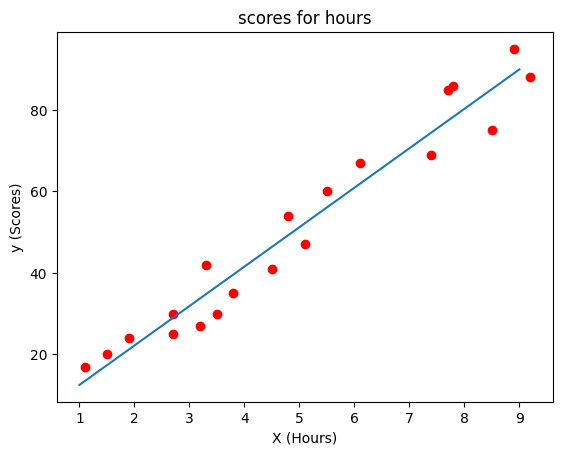

In [ ]:
# 9. 시각화 (matplotlib 완전 정복)
# wk3 압축 파일에 있는 'wk3_ss_q1_graph.png'를 참고하여 그래프를 그리시오.
# Hint : plt 사용, function의 계수 사용, 구간 [1,9]
# 구간 정의를 위해 numpy의 arange 함수를 사용해 1부터 9까지의 정수 배열 선언
point = np.arange(1,10)

# 훈련 세트의 산점도를 붉은색으로 표현
plt.scatter(X_train, y_train, color='red')

# 앞서 선언한 구간의 1차 방정식 그래프를 그림
# 해당 그래프는 선현 회귀 알고리즘이 데이터셋에서 찾은 최적의 직선임
plt.plot(point, point*lr.coef_+lr.intercept_)

# x축 눈금, 제목, 라벨 설정
plt.xticks(point)
plt.title('scores for hours')
plt.xlabel('X (Hours)')
plt.ylabel('y (Scores)')
plt.show()

In [ ]:
# score 함수를 이용해 test 데이터에 대한 점수를 출력해보니 약 0.96임
# model의 score 함수를 이용해 test 데이터에 대한 점수를 구하라.
print(lr.score(X_test, y_test))

0.9678055545167994


## Q2. Polynomial Regression

우리는 다항 회귀에 대해 이해하고자 Housin_Prices_data을 관찰하기로 했다.
다항 회귀를 사용하여 아래 문제를 해결하라.

In [ ]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 두번째로는 다항회귀에 대해 다룸, 먼저 Housing_Prices_data을 불러옴
# load dataset
data = pd.read_csv("/content/drive/MyDrive/wk1/dataset/Housing_Prices_data.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

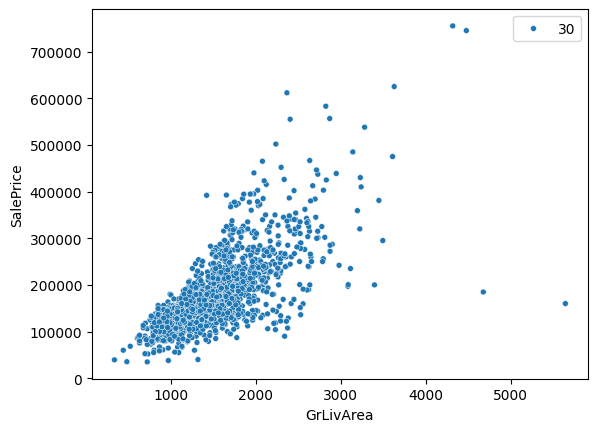

In [ ]:
# 위 데이터가 어떻게 분포 되어 있는지 확인해보자
# wk1의 seaborn 내용을 참고하자
# x는 GrLivArea, y는 SalePrice, size는 30로 설정하여 구성하라

# 데이터의 분포를 확인하기 위해 x는 GrLivArea, y는 SalePrice로 산점도 그래프를 그림
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data, size=30)

In [ ]:
# 전처리
# 필요한 열 선택
# 불러온 데이터에서 GrLivArea와 SalePrice만 선택하여 data에 저장하라
data = data[['GrLivArea', 'SalePrice']]

# 데이터 타입 변환 (문자열 -> 숫자)
data = data.apply(pd.to_numeric, errors='coerce')

# 결측치 처리
data = data.dropna()

# 전처리, 데이터 타입 변환, 결측치 처리를 거친 후에 data를 x,y에 선언
# feature를 bmi, charges만 이용한다는 점은 무슨 말인지 모르겠어서
# 일단 X를 GrLivArea로, y를 SalePrice로 사용

# data를 x, y에 선언하자.
# 이때 feature들로는 bmi, charges만 이용한다고 하자.
X = data['GrLivArea'].to_numpy()
Y = data['SalePrice'].to_numpy()

# reshape 함수를 이용해 X를 2차원으로 변환
# 1차원인 X를 numpy 배열의 2차원으로 reshape 해주자.
X = X.reshape(-1, 1)
print(X.shape)

(1460, 1)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures 변환기를 이용해 X 데이터를 변환
# degree를 2로 설정해 고차항의 최대 차수를 2제곱으로 지정함
# model에 get_feature_names_out 함수로 확인한 결과
# 1, x, x^2이 나오는 것으로 확인해볼 수 있었음

# PolynomialFeatures를 이용하여 degree가 2인 feature들로 변환하자.
model = PolynomialFeatures(degree=2)
x_poly = model.fit_transform(X)

print(x_poly.shape)
model.get_feature_names_out()

(1460, 3)


array(['1', 'x0', 'x0^2'], dtype=object)

In [ ]:
from sklearn.linear_model import LinearRegression
#define model
lr = LinearRegression()

# 앞서 변환한 X 데이터로 선형 회귀 모델을 훈련시킴
lr.fit(x_poly, Y)

# 예측값을 위해 200개의 점들을 0부터 6000까지 구간에서 똑같은 간격으로 생성한 1차원 배열을 생성
# 예측값 생성
X_test = np.linspace(0, 6000, 200).reshape(-1, 1)

# 앞서 사용한 PolynomialFeatures 변환기를 이용해 예측값 데이터도 변환해 값들을 예측해봄
# 변환
graph_ploy = model.transform(X_test)
result = lr.predict(graph_ploy)

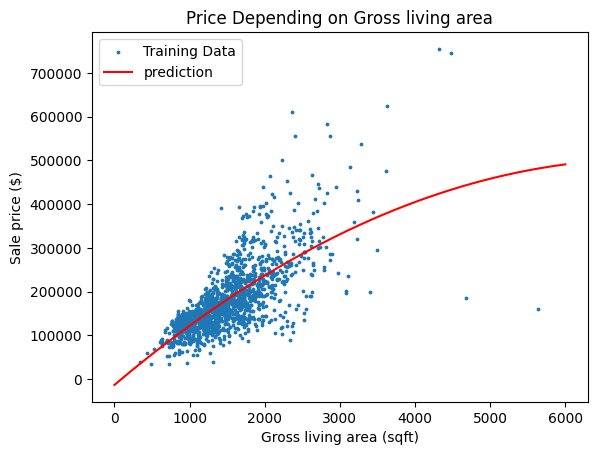

In [ ]:
# 시각화
# 처음 데이터, 즉 훈련 세트의 산점도를 나타냄
plt.scatter(X, Y, s=3)

# 앞서 예측한 예측값으로 2차 방정식 그래프를 그림
plt.plot(X_test, result, color='red')

# 제목, 라벨, 범례 지정
plt.title('Price Depending on Gross living area')
plt.xlabel('Gross living area (sqft)')
plt.ylabel('Sale price ($)')
plt.legend(['Training Data', 'prediction'])
plt.show()

In [ ]:
# 성능 확인하기
# 성능 확인을 위해 훈련 세트의 R^2 점수를 평가, score가 0.50으로 상당히 낮음
train_r2 = lr.score(x_poly, Y)
print('train r2 score:', train_r2)

train r2 score: 0.508504842437747


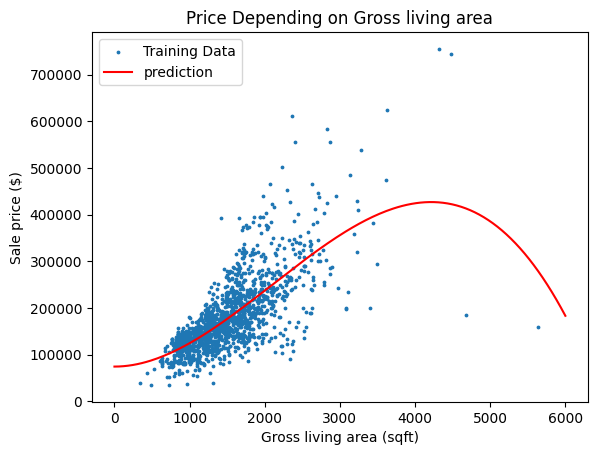

train r2 score: 0.520928204824646


In [ ]:
# degree를 3으로 설정하고, 나머지는 동일하게 진행하자.
# 이번엔 degree를 3, 즉 고차항의 최대 차수를 3으로 지정해 동일하게 진행
model = PolynomialFeatures(degree=3)
x_poly = model.fit_transform(X)

lr = LinearRegression()
lr.fit(x_poly, Y)

# 에측값 생성
X_test = np.linspace(0, 6000, 200).reshape(-1, 1)
graph_ploy = model.transform(X_test)
result = lr.predict(graph_ploy)

plt.scatter(X, Y, s=3)
plt.plot(X_test, result, color='red')
plt.title('Price Depending on Gross living area')
plt.xlabel('Gross living area (sqft)')
plt.ylabel('Sale price ($)')
plt.legend(['Training Data', 'prediction'])
plt.show()

# 성능을 확인해보면 0.52로 전보단 높아졌으나 여전히 낮은 것을 확인할 수 있음
# 성능 확인
print('train r2 score:', lr.score(x_poly, Y))

각 회귀의 `R2` 값이 왜 이렇게 나왔는지 생각해보자.

-> 특성 부족: GrLivArea 하나로 SalePrice를 설명하기엔 정보가 부족하다고 생각

In [ ]:
# 회귀를 통해 얻은 모델을 사용하여, GrLivArea의 값이 1722 sqft인 주택의 가격을 예측하라.

# GrLivArea의 값이 1722인 주택의 가격을 예측하기 위해
# 아까 선언한 PolynomialFeatures 변환기를 이용해 1722를 2차원 배열로 넣어 변환
# X_test 데이터에 대한 다항 특성 변환
X_test_poly = model.transform([[1722]])

# 선현 예측 모델을 통해 예측값 생성
# 모델을 사용하여 X_test_poly에 대한 예측값 생성
predictions = lr.predict(X_test_poly)

# 예측 결과 출력
print(f"Predictions for X_test: $ {predictions}")

Predictions for X_test: $ [202676.63120802]


# Q3. Polynomial Regression 2



#### 규제 적용하기
Q2에서는 규제가 없고, feature가 2개였다. 이번에는 규제를 적용하고, 사용하는 특성을 늘려 다중 회귀를 구현해보자.

In [ ]:
#import required packages
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/wk1/dataset/Housing_Prices_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# 집값을 측정하는데 영향을 미치는 변수들은 많지만, 여기서는 6개의 변수만 사용하도록 하자
# 6개의 변수만 사용하기 위해 dataframe에서 6개의 변수만을 저장
linear_cols = ['OverallQual', 'TotalBsmtSF', 'FullBath', '2ndFlrSF', 'GrLivArea','TotRmsAbvGrd']
df = df[linear_cols + ['SalePrice']]
df.head()

,OverallQual,TotalBsmtSF,FullBath,2ndFlrSF,GrLivArea,TotRmsAbvGrd,SalePrice
0,7,856,2,854,1710,8,208500
1,6,1262,2,0,1262,6,181500
2,7,920,2,866,1786,6,223500
3,7,756,1,756,1717,7,140000
4,8,1145,2,1053,2198,9,250000


In [ ]:
# 결측치 확인
# 결측치 확인을 위해 isnull, sum 함수를 사용
print(df.isnull().sum())

OverallQual     0
TotalBsmtSF     0
FullBath        0
2ndFlrSF        0
GrLivArea       0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64


In [ ]:
# df의 마지막 열을 y(target)로 하고 나머지는 x(features)가 되도록 데이터를 분리해보자.
x = df[linear_cols]
y = df["SalePrice"]

In [ ]:
# train, test로 분리해보자 (단, test_size는 0.2, random state는 156으로 되도록 설정)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=156)

In [ ]:
from sklearn.linear_model import Ridge
# PolynomialFeatures를 사용하여 x_train과 x_test를 변환하자
# 단, degree는 3으로 설정하자
# PolynomialFeatures의 degree를 3으로 설정해 훈련, 테스트셋의 x를 변환
model = PolynomialFeatures(degree=3)
x_poly_train = model.fit_transform(x_train)
x_poly_test = model.fit_transform(x_test)

# from sklearn.linear_model import Ridge 릿지 규제를 사용해서 모델을 학습시켜보자
# 규제를 위해 릿지 규제를 사용, alpha 값을 조정하며 성능을 확인한 결과
# alpha가 커질수록 train와 test 모두 조금씩 하락함, 최고 성능은 alpha가 0.001일 때

# 0.001, 0.8724928448208112 0.843542268516285
# 0.01, 0.8724928063058491 0.843532681825607
# 0.1, 0.872489952068519 0.8434260044939078
# 1, 0.8724350147821965 0.8426273196886769
# 10, 0.8722481894905681 0.8408123726372296
# 100, 0.8716568034096552 0.8403402838615027

ridge = Ridge(alpha=100) # alpha 의 값을 조정하며 성능을 확인해보자
ridge.fit(x_poly_train, y_train)

# 학습된 모델의 train, test score를 확인해보자
train_r3 = ridge.score(x_poly_train, y_train)
test_r3 = ridge.score(x_poly_test, y_test)
y_pred = ridge.predict(x_poly_test)

print(train_r3, test_r3)

0.8716568034096552 0.8403402838615027


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.22224e-22): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


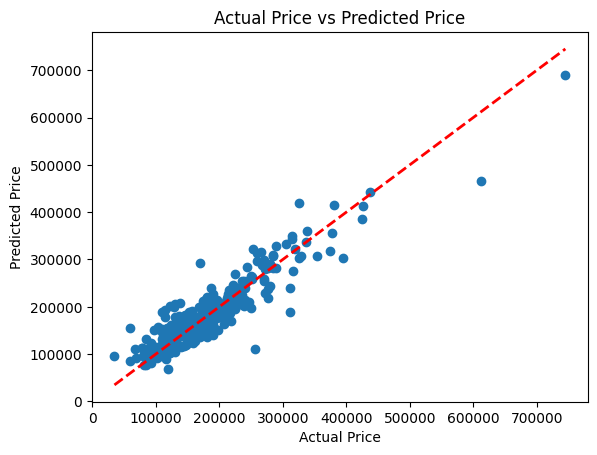

In [ ]:
# 산점도로 샘플값의 (실제값, 예측값)을 나타냄,
# 선형 그래프 위에 샘플 값이 올라와있으면 모델이 잘맞음을 확인할 수 있음

# 시각화
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()

**모델의 정확도 구하기**  
**HINT** :Scikit-learn의 metrics에는 `accuracy_score()`이라는 function이 있습니다. 이 외에도 `mean_squared_error()`를 통해 MSE를 구할 수 있습니다. 이에 대해 찾아보시고 사용해보세요.

이때 pred에는 x_test에 대한 모델의 예측값이 들어가야함.

In [ ]:
# 모델의 정확도를 찾아보자.
# HINT : from sklearn.metrics import accuracy_score를 찾아보시고 사용해보세요.
# 분류 모델의 성능을 평가할 때 사용됨
from sklearn.metrics import mean_squared_error

# y_test: 실제 타겟값, y_pred: 모델의 예측값
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

# mse는 회귀 모델의 평균 제곱 오차를 의미
# 예측값과 실제값의 차이를 제곱해서 평균낸 값으로, 값이 작을수록 모델이 잘 맞음을 나타냄
# mean_squared_error로 실제 타겟값, 모델의 예측값의 평균 제곱 오차를 구함

# accuracy_score는 분류 모델이 맞춘 비율을 나타내는 지표, 회귀에도 사용가능


Mean Squared Error: 1054888895.93


# Bonus

Prometheus 2022 basic study wk3 assignment Problem 2

  
Scikit-learn의 datasets 서브 패키지에는 선형 회귀/로지스틱 회귀용 가상 데이터를 생성할 수 있는 명령어인 `make_regression()`, `make_classification()`이 있습니다. 다음 명령어를 활용해 선형 회귀를 구현하세요.

*1*. `make_regression()`을 활용해 선형 회귀용 가상 데이터를 생성하세요.

- sample은 5000개, feature variable은 2개로 지정하세요.
- y절편을 10 증가시키고, 전체적인 데이터의 variance를 10으로 지정하세요.

In [ ]:
from sklearn.datasets import make_regression

# 선형 회귀용 가상 데이터 생성을 위해 make_regression 함수를 이용
# n_samples 인자로 샘플 수를 5000개로, n_features 인자로 특성 수를 2개로
# bias 인자로 y절편을 10 증가, noise 인자로 표준편차를 10으로 지정
# coef를 True로 설정해서 계수를 함께 반환하도록함
x, y, c = make_regression(n_samples=5000, n_features=2, bias=10, noise=10, coef=True)

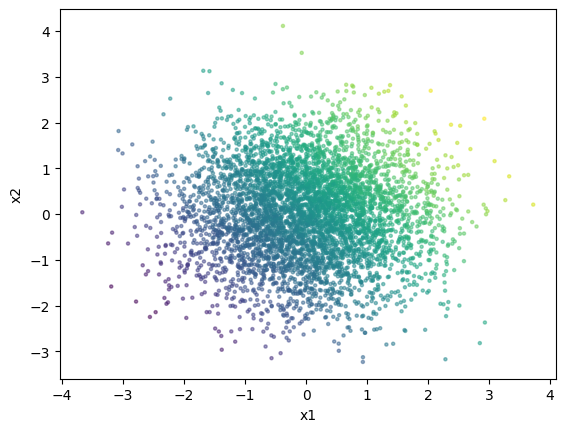

In [ ]:
import matplotlib.pyplot as plt

# 위에서 생성한 가상 데이터를 산점도 그래프로 나타냄
plt.scatter(x[:,0], x[:,1], c=y, s=5, alpha=0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

2. 위의 데이터를 가지고 선형회귀를 구현해보세요.

- train data와 test data를 8:2 비율로 분할하세요.
- 예측 오차를 더 줄이기 위해 데이터 표준화를 진행하세요.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# x와 y를 train data와 test data로 8:2 비율로 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# StandardScaler 변환기로 표준화 진행
# 표준화는 각 특성의 평균이 0, 표준편차 1이 되도록 변환
std_scale = StandardScaler()
std_scale.fit(x_train)

x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)

# 선형 회귀 진행 후 성능을 확인해보니 0.99로 매우 높은 것을 확인해볼 수 있음
lr = LinearRegression()
lr.fit(x_train_std, y_train)
lr.score(x_test_std, y_test)

0.9932879889706049